In [39]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트(윈도우 기준)
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기
df = pd.read_csv("../data/train_raw.csv")

# 3. 만족도 라벨(0/1) 만들기
df['label'] = df['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})

df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,label
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


In [40]:
# 4. 서비스 관련 컬럼 목록
service_columns = [
    'Online boarding', 'Inflight entertainment', 'Inflight wifi service',
    'Seat comfort', 'On-board service', 'Cleanliness', 'Leg room service',
    'Inflight service', 'Ease of Online booking', 'Baggage handling',
    'Checkin service', 'Food and drink', 'Gate location'
]

# 5. 0점은 '이용하지 않음'이므로 NaN으로 처리
df[service_columns] = df[service_columns].replace(0, np.nan)

# 0 비율 확인해보고 싶으면:
(df[service_columns] == 0).mean()


Online boarding           0.0
Inflight entertainment    0.0
Inflight wifi service     0.0
Seat comfort              0.0
On-board service          0.0
Cleanliness               0.0
Leg room service          0.0
Inflight service          0.0
Ease of Online booking    0.0
Baggage handling          0.0
Checkin service           0.0
Food and drink            0.0
Gate location             0.0
dtype: float64

In [41]:
# 6. 충성 / 비충성 고객 분리
loyal = df[df['Customer Type'] == 'Loyal Customer'].copy()
disloyal = df[df['Customer Type'] == 'disloyal Customer'].copy()

# 7. 만족률(= label 평균) 비교
loyal_rate = loyal['label'].mean()
disloyal_rate = disloyal['label'].mean()

print(f"Loyal 고객 만족률 : {loyal_rate:.4f}")
print(f"Disloyal 고객 만족률 : {disloyal_rate:.4f}")


Loyal 고객 만족률 : 0.4773
Disloyal 고객 만족률 : 0.2367


[Loyal Customer 상관계수]
Online boarding           0.541785
Inflight entertainment    0.461086
Seat comfort              0.398033
Leg room service          0.360731
Cleanliness               0.354992
Inflight wifi service     0.351384
On-board service          0.338672
Baggage handling          0.264824
Inflight service          0.261884
Food and drink            0.238279
Checkin service           0.237381
Ease of Online booking    0.175961
Gate location             0.015914
Name: label, dtype: float64


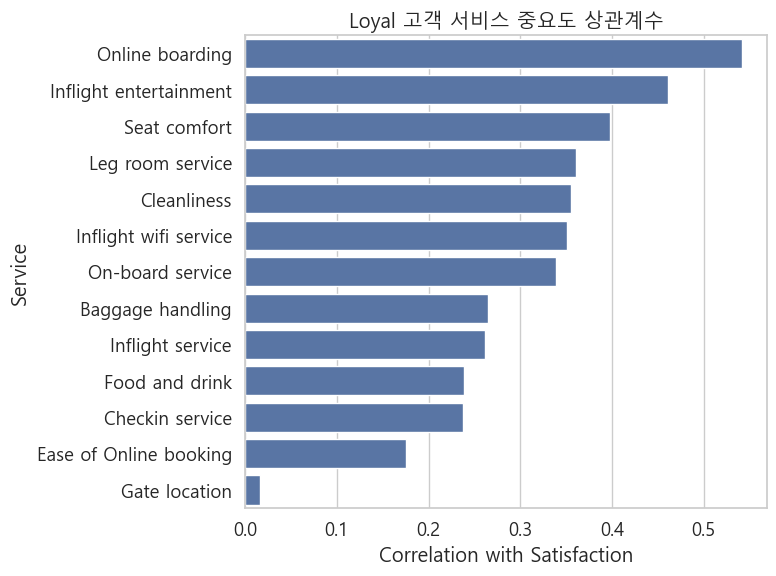

In [42]:
# 8. 충성 고객 서비스 상관계수
loyal_corr = (
    loyal[service_columns + ['label']]
    .corr()['label']
    .drop('label')
    .sort_values(ascending=False)
)

print("[Loyal Customer 상관계수]")
print(loyal_corr)

# 9. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=loyal_corr.values, y=loyal_corr.index)
plt.title("Loyal 고객 서비스 중요도 상관계수")
plt.xlabel("Correlation with Satisfaction")
plt.ylabel("Service")
plt.tight_layout()
plt.show()


[Disloyal Customer 상관계수]
Inflight wifi service     0.669604
Ease of Online booking    0.630059
Online boarding           0.593407
Checkin service           0.222327
Baggage handling          0.212385
On-board service          0.210937
Inflight service          0.206775
Leg room service          0.070200
Food and drink            0.034920
Inflight entertainment    0.022861
Cleanliness               0.012616
Seat comfort              0.011375
Gate location            -0.083748
Name: label, dtype: float64


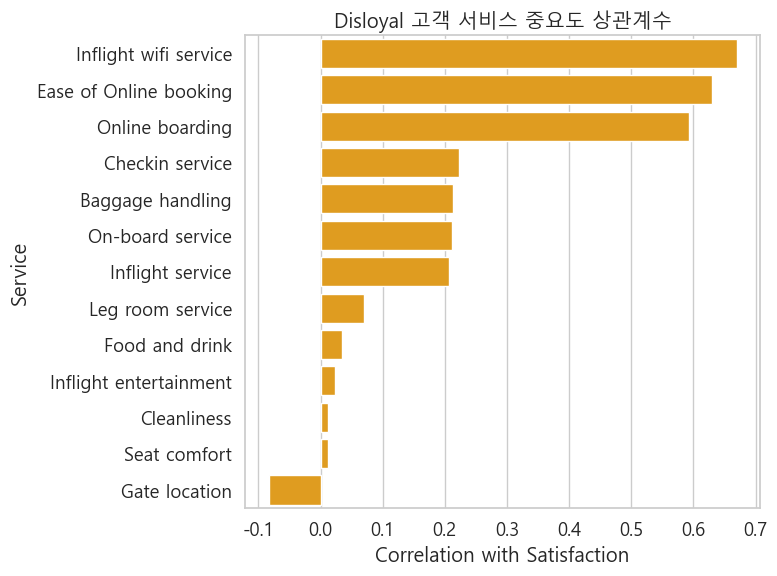

In [47]:
# 10. 비충성 고객 서비스 상관계수
disloyal_corr = (
    disloyal[service_columns + ['label']]
    .corr()['label']
    .drop('label')
    .sort_values(ascending=False)
)

print("[Disloyal Customer 상관계수]")
print(disloyal_corr)

# 11. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=disloyal_corr.values, y=disloyal_corr.index, color='orange')
plt.title("Disloyal 고객 서비스 중요도 상관계수")
plt.xlabel("Correlation with Satisfaction")
plt.ylabel("Service")
plt.tight_layout()
plt.show()


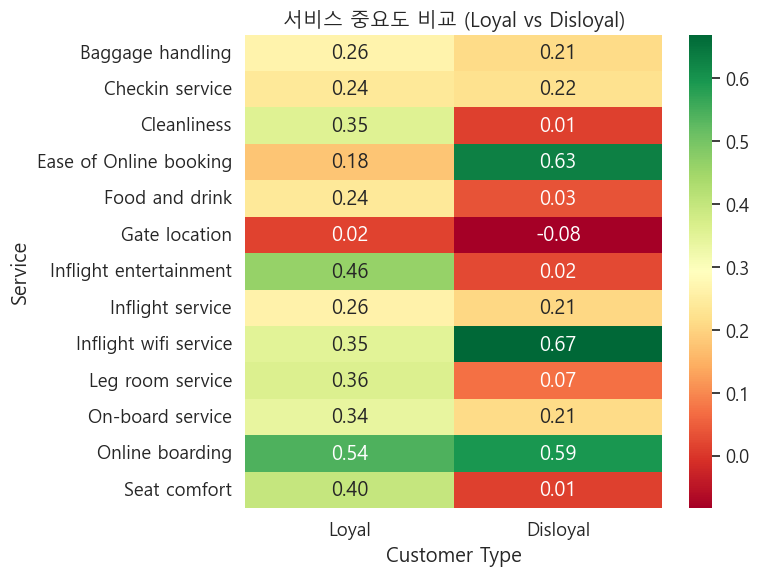

In [44]:
# 12. 두 그룹 상관계수 합치기
compare_df = pd.DataFrame({
    'Loyal': loyal_corr,
    'Disloyal': disloyal_corr
})

# 13. 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(compare_df, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("서비스 중요도 비교 (Loyal vs Disloyal)")
plt.xlabel("Customer Type")
plt.ylabel("Service")
plt.tight_layout()
plt.show()


In [48]:
compare_corr = pd.DataFrame({
    'Loyal': loyal_corr,
    'Disloyal': disloyal_corr
})

compare_corr

,Loyal,Disloyal
Baggage handling,0.264824,0.212385
Checkin service,0.237381,0.222327
Cleanliness,0.354992,0.012616
Ease of Online booking,0.175961,0.630059
Food and drink,0.238279,0.034920
Gate location,0.015914,-0.083748
Inflight entertainment,0.461086,0.022861
Inflight service,0.261884,0.206775
Inflight wifi service,0.351384,0.669604
Leg room service,0.360731,0.070200


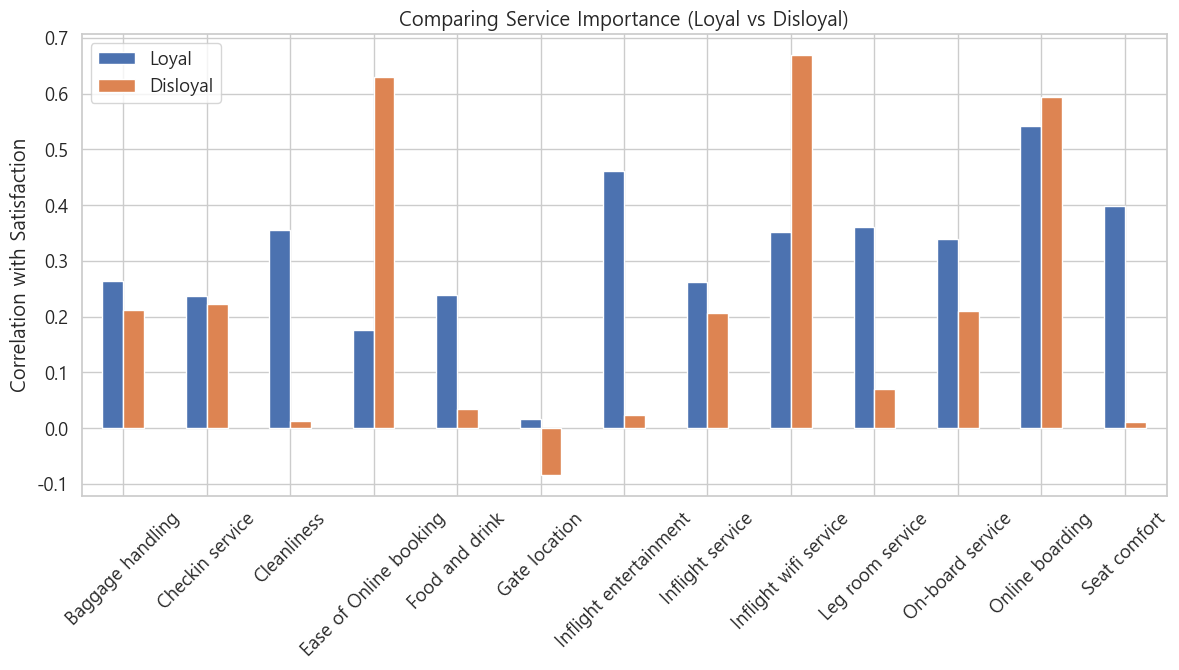

In [49]:
compare_corr.plot(kind='bar', figsize=(14,6))
plt.title("Comparing Service Importance (Loyal vs Disloyal)")
plt.ylabel("Correlation with Satisfaction")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
avg_score_compare = pd.DataFrame({
    'Loyal_Avg': loyal[service_columns].mean(),
    'Disloyal_Avg': disloyal[service_columns].mean()
})

avg_score_compare['Diff'] = avg_score_compare['Loyal_Avg'] - avg_score_compare['Disloyal_Avg']
avg_score_compare.sort_values('Diff')


,Loyal_Avg,Disloyal_Avg,Diff
Baggage handling,3.618030,3.693588,-0.075558
Inflight service,3.627828,3.696802,-0.068975
Gate location,2.973211,2.993309,-0.020098
Inflight wifi service,2.734418,2.708498,0.025920
Ease of Online booking,2.769803,2.699173,0.070630
Checkin service,3.323540,3.218166,0.105375
Leg room service,3.380827,3.217849,0.162978
On-board service,3.416813,3.228228,0.188585
Food and drink,3.239499,3.034930,0.204570
Cleanliness,3.338224,3.054265,0.283959


In [64]:
delay_corr = pd.DataFrame({
    "Loyal": loyal[['Departure Delay in Minutes','Arrival Delay in Minutes','label']].corr()['label'][0:2],
    "Disloyal": disloyal[['Departure Delay in Minutes','Arrival Delay in Minutes','label']].corr()['label'][0:2]
})
delay_corr

,Loyal,Disloyal
Departure Delay in Minutes,-0.053927,-0.033739
Arrival Delay in Minutes,-0.060733,-0.042515


[Delay 영향 비교]
                               Loyal  Disloyal
Departure Delay in Minutes -0.053927 -0.033739
Arrival Delay in Minutes   -0.060733 -0.042515


<Figure size 800x500 with 0 Axes>

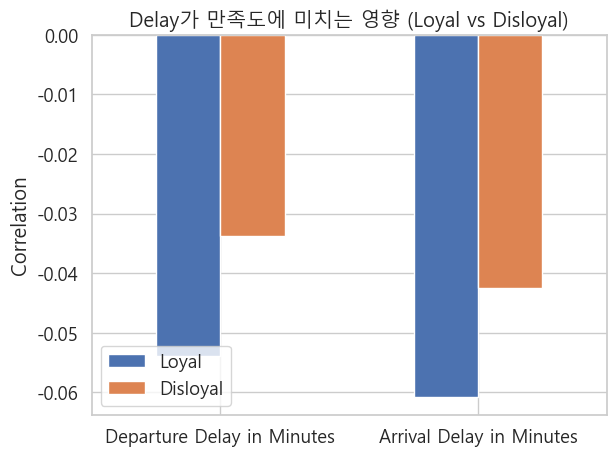

In [50]:
# 14. Delay와 만족도의 상관계수
delay_corr = pd.DataFrame({
    "Loyal": loyal[['Departure Delay in Minutes', 'Arrival Delay in Minutes']]
                .corrwith(loyal['label']),
    "Disloyal": disloyal[['Departure Delay in Minutes', 'Arrival Delay in Minutes']]
                .corrwith(disloyal['label'])
})

print("[Delay 영향 비교]")
print(delay_corr)

# 15. 막대 그래프
plt.figure(figsize=(8, 5))
delay_corr.plot(kind='bar')
plt.title("Delay가 만족도에 미치는 영향 (Loyal vs Disloyal)")
plt.ylabel("Correlation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [63]:
summary = {
    "Loyal Satisfaction Rate": ct.loc['Loyal Customer','satisfied'],
    "Disloyal Satisfaction Rate": ct.loc['disloyal Customer','satisfied'],
    "Top Service (Loyal)": loyal_corr.index[0],
    "Top Service (Disloyal)": disloyal_corr.index[0],
    "Most Negative Diff Service": avg_score_compare['Diff'].idxmin(),
    "Delay Sensitivity Loyal": delay_corr.loc["Departure Delay in Minutes","Loyal"]
}

summary

{'Loyal Satisfaction Rate': np.float64(0.47729119319854457),
 'Disloyal Satisfaction Rate': np.float64(0.23665771034192087),
 'Top Service (Loyal)': 'Online boarding',
 'Top Service (Disloyal)': 'Inflight wifi service',
 'Most Negative Diff Service': 'Baggage handling',
 'Delay Sensitivity Loyal': np.float64(-0.053927010510584454)}